In [66]:
import numpy as np
import scipy
from numpy import mean, absolute
import pandas as pd
from sklearn import *

from scipy import spatial
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import distance
import math
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
from itertools import chain
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [68]:
from os import listdir
from pathlib import Path
from os.path import isfile, join
from natsort import natsorted ## !pip install natsort

In [69]:
rootpath="dataset/"
listfiles = [f for f in listdir(rootpath) if isfile(join(rootpath, f))]
listfiles=natsorted(listfiles)
listfiles

['1.Deauth_NZVAR_33.csv',
 '2.Disas_NZVAR_33.csv',
 '3.(Re)Assoc_NZVAR_33.csv',
 '4.Rogue_AP_NZVAR_33.csv',
 '5.Krack_NZVAR_33.csv',
 '6.Kr00k_NZVAR_33.csv',
 '7.SSH_NZVAR_33.csv',
 '8.Botnet_NZVAR_33.csv',
 '9.Malware_NZVAR_33.csv',
 '10.SQL_Injection_NZVAR_33.csv',
 '11.SSDP_NZVAR_33.csv',
 '12.Evil_Twin_NZVAR_33.csv',
 '13.Website_spoofing_NZVAR_33.csv']

In [70]:
df = pd.DataFrame()
for file in listfiles:
    df_temp = pd.read_csv (rootpath+file, low_memory=False, header=None)
    print(df_temp.shape)
    #print(df_temp.columns)
    df=pd.concat([df,df_temp])
    print(df.shape)


(1626469, 33)
(1626469, 33)
(2013716, 33)
(3640185, 33)
(1843938, 33)
(5484123, 33)
(1973185, 33)
(7457308, 33)
(1438488, 33)
(8895796, 33)
(2900440, 33)
(11796236, 33)
(2440570, 33)
(14236806, 33)
(3226060, 33)
(17462866, 33)
(2312760, 33)
(19775626, 33)
(2598356, 33)
(22373982, 33)
(8141644, 33)
(30515626, 33)
(3778706, 33)
(34294332, 33)
(2668567, 33)
(36962899, 33)


In [71]:
df.columns=['Label', 'frame.len', 'frame.number', 'frame.time', 'frame.time_delta', 
            'frame.time_delta_displayed', 'frame.time_epoch', 'frame.time_relative', 
            'radiotap.datarate', 'radiotap.dbm_antsignal', 'radiotap.length', 'radiotap.mactime', 
            'radiotap.present.tsft', 'radiotap.timestamp.ts', 'wlan.duration', 'wlan.fc.ds', 'wlan.fc.frag', 
            'wlan.fc.moredata', 'wlan.fc.order', 'wlan.fc.protected', 'wlan.fc.pwrmgt', 'wlan.fc.retry', 
            'wlan.fc.subtype', 'wlan.fc.type', 'wlan.ra', 'wlan.ta', 'wlan_radio.data_rate', 'wlan_radio.duration', 
            'wlan_radio.end_tsf', 'wlan_radio.phy', 'wlan_radio.signal_dbm', 'wlan_radio.start_tsf', 'wlan_radio.timestamp']

In [72]:
df.head()

,Label,frame.len,frame.number,frame.time,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_relative,radiotap.datarate,radiotap.dbm_antsignal,...,wlan.fc.type,wlan.ra,wlan.ta,wlan_radio.data_rate,wlan_radio.duration,wlan_radio.end_tsf,wlan_radio.phy,wlan_radio.signal_dbm,wlan_radio.start_tsf,wlan_radio.timestamp
0,Normal,342.0,1.0,Dec 18- 2020 17:42:58.482600000 GTB Standard Time,0.000000,0.000000,1.608306e+09,0.000000,6.0,-34-37-34,...,0.0,ff:ff:ff:ff:ff:ff,0c:9d:92:54:fe:34,6.0,408.0,1.161400e+10,5,-34.0,1.161399e+10,1.161400e+10
1,Normal,342.0,2.0,Dec 18- 2020 17:42:58.585010000 GTB Standard Time,0.102410,0.102410,1.608306e+09,0.102410,6.0,-34-38-34,...,0.0,ff:ff:ff:ff:ff:ff,0c:9d:92:54:fe:34,6.0,408.0,1.161410e+10,5,-34.0,1.161410e+10,1.161410e+10
2,Normal,136.0,3.0,Dec 18- 2020 17:42:58.629796000 GTB Standard Time,0.044786,0.044786,1.608306e+09,0.147196,6.0,-34-39-34,...,2.0,ff:ff:ff:ff:ff:ff,0c:9d:92:54:fe:34,6.0,132.0,1.161414e+10,5,-34.0,1.161414e+10,1.161414e+10
3,Normal,154.0,4.0,Dec 18- 2020 17:42:58.637295000 GTB Standard Time,0.007499,0.007499,1.608306e+09,0.154695,6.0,-34-39-34,...,2.0,ff:ff:ff:ff:ff:ff,0c:9d:92:54:fe:34,6.0,156.0,1.161415e+10,5,-34.0,1.161415e+10,1.161415e+10
4,Normal,342.0,5.0,Dec 18- 2020 17:42:58.687421000 GTB Standard Time,0.050126,0.050126,1.608306e+09,0.204821,6.0,-35-40-35,...,0.0,ff:ff:ff:ff:ff:ff,0c:9d:92:54:fe:34,6.0,408.0,1.161420e+10,5,-35.0,1.161420e+10,1.161420e+10


### Exploratory Analysis

In [132]:
for i in df2:
    print(i+" "+str(len(df2[i].unique())))
    #print(len(df2[i].unique()))

Label 16
frame.len 2667
frame.number 8141521
frame.time 36757552
frame.time_delta 44815
frame.time_delta_displayed 44815
frame.time_epoch 4203308
frame.time_relative 35599230
radiotap.datarate 32
radiotap.dbm_antsignal 2188
radiotap.length 3
radiotap.mactime 19218034
radiotap.present.tsft 2
radiotap.timestamp.ts 23783504
wlan.duration 4506
wlan.fc.ds 4
wlan.fc.frag 2
wlan.fc.moredata 2
wlan.fc.order 2
wlan.fc.protected 2
wlan.fc.pwrmgt 2
wlan.fc.retry 2
wlan.fc.subtype 29
wlan.fc.type 3
wlan.ra 9834
wlan.ta 12603
wlan_radio.data_rate 36
wlan_radio.duration 1458
wlan_radio.end_tsf 19218034
wlan_radio.phy 8
wlan_radio.signal_dbm 69
wlan_radio.start_tsf 19217612
wlan_radio.timestamp 19218034


In [74]:
df.iloc[:,0].unique()

array(['Normal', 'Deauth', 'Disas', '(Re)Assoc', nan, 'RogueAP', 'Krack',
       'Kr00k', 'Kr00K', 'SSH', 'Botnet', 'Malware', 'SQL_Injection',
       'SSDP', 'SDDP', 'Evil_Twin', 'Website_spoofing'], dtype=object)

In [75]:
nan_values=df.isna().sum()
nan_values

Label                              310
frame.len                          155
frame.number                       155
frame.time                         155
frame.time_delta                   155
frame.time_delta_displayed         155
frame.time_epoch                   155
frame.time_relative                155
radiotap.datarate             17146816
radiotap.dbm_antsignal             155
radiotap.length                    155
radiotap.mactime              17742452
radiotap.present.tsft              155
radiotap.timestamp.ts              155
wlan.duration                      212
wlan.fc.ds                         155
wlan.fc.frag                       155
wlan.fc.moredata                   155
wlan.fc.order                      155
wlan.fc.protected                  155
wlan.fc.pwrmgt                     155
wlan.fc.retry                      155
wlan.fc.subtype                    148
wlan.fc.type                       155
wlan.ra                            155
wlan.ta                  

### Removing Rows with nan as labels

In [76]:
df = df[df['Label'].notna()]
df.shape

(36962589, 33)

In [77]:
nan_values=df.isna().sum()
nan_values

Label                                0
frame.len                            2
frame.number                         2
frame.time                           2
frame.time_delta                     2
frame.time_delta_displayed           2
frame.time_epoch                     2
frame.time_relative                  2
radiotap.datarate             17146506
radiotap.dbm_antsignal               2
radiotap.length                      2
radiotap.mactime              17742142
radiotap.present.tsft                2
radiotap.timestamp.ts                2
wlan.duration                       59
wlan.fc.ds                           2
wlan.fc.frag                         2
wlan.fc.moredata                     2
wlan.fc.order                        2
wlan.fc.protected                    2
wlan.fc.pwrmgt                       2
wlan.fc.retry                        2
wlan.fc.subtype                      2
wlan.fc.type                         2
wlan.ra                              2
wlan.ta                  

In [78]:
df2 = df[df['frame.len'].notna()]
df2.shape

(36962587, 33)

In [79]:
nan_values2=df2.isna().sum()
nan_values2

Label                                0
frame.len                            0
frame.number                         0
frame.time                           0
frame.time_delta                     0
frame.time_delta_displayed           0
frame.time_epoch                     0
frame.time_relative                  0
radiotap.datarate             17146504
radiotap.dbm_antsignal               0
radiotap.length                      0
radiotap.mactime              17742140
radiotap.present.tsft                0
radiotap.timestamp.ts                0
wlan.duration                       57
wlan.fc.ds                           0
wlan.fc.frag                         0
wlan.fc.moredata                     0
wlan.fc.order                        0
wlan.fc.protected                    0
wlan.fc.pwrmgt                       0
wlan.fc.retry                        0
wlan.fc.subtype                      0
wlan.fc.type                         0
wlan.ra                              0
wlan.ta                  

### Check each of the columns to see the nature of the data

In [80]:
df.iloc[:,0].head()

0    Normal
1    Normal
2    Normal
3    Normal
4    Normal
Name: Label, dtype: object

In [81]:
df.iloc[:,1].head()

0    342.0
1    342.0
2    136.0
3    154.0
4    342.0
Name: frame.len, dtype: float64

In [82]:
df.iloc[:,2].head()

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
Name: frame.number, dtype: float64

In [83]:
df.iloc[:,3].head()

0    Dec 18- 2020 17:42:58.482600000 GTB Standard Time
1    Dec 18- 2020 17:42:58.585010000 GTB Standard Time
2    Dec 18- 2020 17:42:58.629796000 GTB Standard Time
3    Dec 18- 2020 17:42:58.637295000 GTB Standard Time
4    Dec 18- 2020 17:42:58.687421000 GTB Standard Time
Name: frame.time, dtype: object

In [84]:
df.iloc[:,4].head()

0    0.000000
1    0.102410
2    0.044786
3    0.007499
4    0.050126
Name: frame.time_delta, dtype: float64

In [85]:
df.iloc[:,5].head()

0    0.000000
1    0.102410
2    0.044786
3    0.007499
4    0.050126
Name: frame.time_delta_displayed, dtype: float64

In [86]:
df.iloc[:,6].head()

0    1.608306e+09
1    1.608306e+09
2    1.608306e+09
3    1.608306e+09
4    1.608306e+09
Name: frame.time_epoch, dtype: float64

In [87]:
df.iloc[:,7].head()

0    0.000000
1    0.102410
2    0.147196
3    0.154695
4    0.204821
Name: frame.time_relative, dtype: float64

In [88]:
df.iloc[:,8].head()

0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: radiotap.datarate, dtype: float64

In [89]:
df.iloc[:,9].head()

0    -34-37-34
1    -34-38-34
2    -34-39-34
3    -34-39-34
4    -35-40-35
Name: radiotap.dbm_antsignal, dtype: object

In [90]:
df.iloc[:,10].head()

0    56.0
1    56.0
2    56.0
3    56.0
4    56.0
Name: radiotap.length, dtype: float64

In [91]:
df.iloc[:,11].head()

0    1.161400e+10
1    1.161410e+10
2    1.161414e+10
3    1.161415e+10
4    1.161420e+10
Name: radiotap.mactime, dtype: float64

In [92]:
df.iloc[:,12].head()

0    1-0-0
1    1-0-0
2    1-0-0
3    1-0-0
4    1-0-0
Name: radiotap.present.tsft, dtype: object

In [93]:
df.iloc[:,13].head()

0    3.024061e+09
1    3.024163e+09
2    3.024208e+09
3    3.024215e+09
4    3.024265e+09
Name: radiotap.timestamp.ts, dtype: float64

In [94]:
df.iloc[:,14].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: wlan.duration, dtype: float64

In [95]:
df.iloc[:,15].head()

0    0x00000000
1    0x00000000
2    0x00000002
3    0x00000002
4    0x00000000
Name: wlan.fc.ds, dtype: object

In [96]:
df.iloc[:,16].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: wlan.fc.frag, dtype: float64

In [97]:
df.iloc[:,17].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: wlan.fc.moredata, dtype: float64

In [98]:
df.iloc[:,18].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: wlan.fc.order, dtype: float64

In [99]:
df.iloc[:,19].head()

0    0.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: wlan.fc.protected, dtype: float64

In [100]:
df.iloc[:,20].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: wlan.fc.pwrmgt, dtype: float64

In [101]:
df.iloc[:,21].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: wlan.fc.retry, dtype: float64

In [102]:
df.iloc[:,22].head()

0    8.0
1    8.0
2    0.0
3    0.0
4    8.0
Name: wlan.fc.subtype, dtype: object

In [103]:
df.iloc[:,23].head()

0    0.0
1    0.0
2    2.0
3    2.0
4    0.0
Name: wlan.fc.type, dtype: float64

In [104]:
df.iloc[:,24].head()

0    ff:ff:ff:ff:ff:ff
1    ff:ff:ff:ff:ff:ff
2    ff:ff:ff:ff:ff:ff
3    ff:ff:ff:ff:ff:ff
4    ff:ff:ff:ff:ff:ff
Name: wlan.ra, dtype: object

In [105]:
df.iloc[:,25].head()

0    0c:9d:92:54:fe:34
1    0c:9d:92:54:fe:34
2    0c:9d:92:54:fe:34
3    0c:9d:92:54:fe:34
4    0c:9d:92:54:fe:34
Name: wlan.ta, dtype: object

In [106]:
df.iloc[:,26].head()

0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: wlan_radio.data_rate, dtype: float64

In [107]:
df.iloc[:,27].head()

0    408.0
1    408.0
2    132.0
3    156.0
4    408.0
Name: wlan_radio.duration, dtype: float64

In [108]:
df.iloc[:,28].head()

0    1.161400e+10
1    1.161410e+10
2    1.161414e+10
3    1.161415e+10
4    1.161420e+10
Name: wlan_radio.end_tsf, dtype: float64

In [109]:
df.iloc[:,29].head()

0    5
1    5
2    5
3    5
4    5
Name: wlan_radio.phy, dtype: object

In [110]:
df.iloc[:,30].head()

0   -34.0
1   -34.0
2   -34.0
3   -34.0
4   -35.0
Name: wlan_radio.signal_dbm, dtype: float64

In [111]:
df.iloc[:,31].head()

0    1.161399e+10
1    1.161410e+10
2    1.161414e+10
3    1.161415e+10
4    1.161420e+10
Name: wlan_radio.start_tsf, dtype: float64

In [112]:
df.iloc[:,32].head()

0    1.161400e+10
1    1.161410e+10
2    1.161414e+10
3    1.161415e+10
4    1.161420e+10
Name: wlan_radio.timestamp, dtype: float64

### saving the dataset

In [119]:
df2.to_csv('AWID3_NZVAR_33.csv',
          index = False, 
          header = True)

### Load the dataset

In [120]:
test=pd.read_csv ('AWID3_NZVAR_33.csv', low_memory=False)
test.head()

,Label,frame.len,frame.number,frame.time,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_relative,radiotap.datarate,radiotap.dbm_antsignal,...,wlan.fc.type,wlan.ra,wlan.ta,wlan_radio.data_rate,wlan_radio.duration,wlan_radio.end_tsf,wlan_radio.phy,wlan_radio.signal_dbm,wlan_radio.start_tsf,wlan_radio.timestamp
0,Normal,342.0,1.0,Dec 18- 2020 17:42:58.482600000 GTB Standard Time,0.000000,0.000000,1.608306e+09,0.000000,6.0,-34-37-34,...,0.0,ff:ff:ff:ff:ff:ff,0c:9d:92:54:fe:34,6.0,408.0,1.161400e+10,5.0,-34.0,1.161399e+10,1.161400e+10
1,Normal,342.0,2.0,Dec 18- 2020 17:42:58.585010000 GTB Standard Time,0.102410,0.102410,1.608306e+09,0.102410,6.0,-34-38-34,...,0.0,ff:ff:ff:ff:ff:ff,0c:9d:92:54:fe:34,6.0,408.0,1.161410e+10,5.0,-34.0,1.161410e+10,1.161410e+10
2,Normal,136.0,3.0,Dec 18- 2020 17:42:58.629796000 GTB Standard Time,0.044786,0.044786,1.608306e+09,0.147196,6.0,-34-39-34,...,2.0,ff:ff:ff:ff:ff:ff,0c:9d:92:54:fe:34,6.0,132.0,1.161414e+10,5.0,-34.0,1.161414e+10,1.161414e+10
3,Normal,154.0,4.0,Dec 18- 2020 17:42:58.637295000 GTB Standard Time,0.007499,0.007499,1.608306e+09,0.154695,6.0,-34-39-34,...,2.0,ff:ff:ff:ff:ff:ff,0c:9d:92:54:fe:34,6.0,156.0,1.161415e+10,5.0,-34.0,1.161415e+10,1.161415e+10
4,Normal,342.0,5.0,Dec 18- 2020 17:42:58.687421000 GTB Standard Time,0.050126,0.050126,1.608306e+09,0.204821,6.0,-35-40-35,...,0.0,ff:ff:ff:ff:ff:ff,0c:9d:92:54:fe:34,6.0,408.0,1.161420e+10,5.0,-35.0,1.161420e+10,1.161420e+10


### Remove Columns no needed for this study

In [126]:
data_df=df2.drop(columns=['frame.time'])
data_df.shape

(36962587, 32)

In [128]:
df2.iloc[:,12].unique()

array(['1-0-0', '0-0-0'], dtype=object)

In [134]:
df2.iloc[:,15].unique()

array(['0x00000000', '0x00000002', '0x00000001', '0x00000003'],
      dtype=object)

In [135]:
df2.iloc[:,22].unique()

array([8.0, 0.0, 4.0, 5.0, 11.0, 13.0, 1.0, 9.0, 12.0, 14.0, 10.0, 15.0,
       2.0, 3.0, 7.0, '8', '9', '11', '12', '5', '13', '0', '4', '14',
       '1', '10', '2', '3', '15'], dtype=object)

In [136]:
df2.iloc[:,29].unique()

array([5, 8, 7, '5', '8', '7', 4, 6], dtype=object)

##### Changing objects to float

In [138]:
data_df['wlan.fc.subtype']=pd.to_numeric(data_df['wlan.fc.subtype'])
data_df.iloc[:,21].unique()

array([ 8.,  0.,  4.,  5., 11., 13.,  1.,  9., 12., 14., 10., 15.,  2.,
        3.,  7.])

In [139]:
data_df['wlan_radio.phy']=pd.to_numeric(data_df['wlan_radio.phy'])
data_df.iloc[:,28].unique()

array([5., 8., 7., 4., 6.])

In [148]:
data_df.iloc[:,11].unique()

array(['1-0-0', '0-0-0'], dtype=object)

In [150]:
values_to_replace_11_radi_pre_tsft = {'0-0-0':0, '1-0-0':1}

In [151]:
data_df['radiotap.present.tsft'] = data_df['radiotap.present.tsft'].map(values_to_replace_11_radi_pre_tsft)

In [152]:
data_df.iloc[:,11].unique()

array([1, 0], dtype=int64)

### Replace MAC address with 1 or 0

In [141]:
data_df.iloc[:,23].unique()

array(['ff:ff:ff:ff:ff:ff', '00:c0:ca:a8:26:3e', '01:80:c2:00:00:00', ...,
       '0c:9d:96:05:fc:30', '4d:9d:b6:55:fc:b0', '4c:9d:b7:05:f4:b4'],
      dtype=object)

In [140]:
data_df.iloc[:,24].unique()

array(['0c:9d:92:54:fe:34', '00:c0:ca:a8:26:3e', '88:66:a5:55:a2:d4', ...,
       '10:3e:ae:3c:43:1b', '18:be:aa:64:01:93', '88:66:af:55:a2:94'],
      dtype=object)

In [142]:
ind = data_df.iloc[:,23].notna()
data_df.iloc[ind, 23] = 1
ind = data_df.iloc[:,23].isna()
data_df.iloc[ind, 23] = 0

In [144]:
ind = data_df.iloc[:,24].notna()
data_df.iloc[ind, 24] = 1
ind = data_df.iloc[:,24].isna()
data_df.iloc[ind, 24] = 0

In [145]:
nan_values3=data_df.isna().sum()
nan_values3

Label                                0
frame.len                            0
frame.number                         0
frame.time_delta                     0
frame.time_delta_displayed           0
frame.time_epoch                     0
frame.time_relative                  0
radiotap.datarate             17146504
radiotap.dbm_antsignal               0
radiotap.length                      0
radiotap.mactime              17742140
radiotap.present.tsft                0
radiotap.timestamp.ts                0
wlan.duration                       57
wlan.fc.ds                           0
wlan.fc.frag                         0
wlan.fc.moredata                     0
wlan.fc.order                        0
wlan.fc.protected                    0
wlan.fc.pwrmgt                       0
wlan.fc.retry                        0
wlan.fc.subtype                      0
wlan.fc.type                         0
wlan.ra                              0
wlan.ta                              0
wlan_radio.data_rate     

### Replace labels with enconde value

In [137]:
data_df.iloc[:,0].unique()

array(['Normal', 'Deauth', 'Disas', '(Re)Assoc', 'RogueAP', 'Krack',
       'Kr00k', 'Kr00K', 'SSH', 'Botnet', 'Malware', 'SQL_Injection',
       'SSDP', 'SDDP', 'Evil_Twin', 'Website_spoofing'], dtype=object)

In [122]:
values_to_replace_labels = {'Normal':0, 'Deauth':1, 'Disas': 2, '(Re)Assoc':3,
                            'RogueAP':4, 'Krack':5, 'Kr00k': 6, 'Kr00K':6,
                            'SSH':7, 'Botnet':8, 'Malware': 9, 'SQL_Injection':10,
                            'SSDP':11, 'SDDP':11, 'Evil_Twin': 12, 'Website_spoofing':13
                            }

In [153]:
data_df['Label'] = data_df['Label'].map(values_to_replace_labels)
data_df.iloc[:,0].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
      dtype=int64)

In [146]:
data_df.iloc[:,14].unique()

array(['0x00000000', '0x00000002', '0x00000001', '0x00000003'],
      dtype=object)

In [147]:
values_to_replace_14_fs_ds = {'0x00000000':0, '0x00000001':1, '0x00000002': 2, '0x00000003':3}

In [154]:
data_df['wlan.fc.ds'] = data_df['wlan.fc.ds'].map(values_to_replace_14_fs_ds)
data_df.iloc[:,14].unique()

array([0, 2, 1, 3], dtype=int64)

In [168]:
data_df.iloc[:,7].unique()

array([  6.    ,      nan,  24.    ,  12.    ,  54.    ,  72.2222,
        57.7778,  52.    ,   6.5   ,  48.    ,  36.    ,  18.    ,
         9.    , 130.    ,   1.    ,  39.    ,  19.5   ,  78.    ,
        13.    ,  11.    ,   5.5   ,   2.    , 117.    ,  26.    ,
       104.    ,  65.    ,  58.5   , 144.444 ,  43.3333,  28.8889,
        86.6667, 115.556 ])

### Replace missing values with most frequent values or median, remove columns with lot of NaN

In [155]:
nan_values4=data_df.isna().sum()
nan_values4

Label                                0
frame.len                            0
frame.number                         0
frame.time_delta                     0
frame.time_delta_displayed           0
frame.time_epoch                     0
frame.time_relative                  0
radiotap.datarate             17146504
radiotap.dbm_antsignal               0
radiotap.length                      0
radiotap.mactime              17742140
radiotap.present.tsft                0
radiotap.timestamp.ts                0
wlan.duration                       57
wlan.fc.ds                           0
wlan.fc.frag                         0
wlan.fc.moredata                     0
wlan.fc.order                        0
wlan.fc.protected                    0
wlan.fc.pwrmgt                       0
wlan.fc.retry                        0
wlan.fc.subtype                      0
wlan.fc.type                         0
wlan.ra                              0
wlan.ta                              0
wlan_radio.data_rate     

In [162]:
med_13=data_df.iloc[:,13].median()
mean_13=data_df.iloc[:,13].mean()
mode_13=data_df.iloc[:,13].mode()


In [163]:
med_7=data_df.iloc[:,7].median()
mean_7=data_df.iloc[:,7].mean()
mode_7=data_df.iloc[:,7].mode()

med_10=data_df.iloc[:,10].median()
mean_10=data_df.iloc[:,10].mean()
mode_10=data_df.iloc[:,10].mode()

med_27=data_df.iloc[:,27].median()
mean_27=data_df.iloc[:,27].mean()
mode_27=data_df.iloc[:,27].mode()

med_30=data_df.iloc[:,30].median()
mean_30=data_df.iloc[:,30].mean()
mode_30=data_df.iloc[:,30].mode()

med_31=data_df.iloc[:,31].median()
mean_31=data_df.iloc[:,31].mean()
mode_31=data_df.iloc[:,31].mode()

In [167]:
print(med_7 , mean_7, mode_7.mean())
print(med_10 , mean_10, mode_10.mean())
print(med_13 , mean_13, mode_13.mean())
print(med_27 , mean_27, mode_27.mean())
print(med_30 , mean_30, mode_30.mean())
print(med_31 , mean_31, mode_31.mean())

24.0 24.522860239225537 24.0
12996966614.0 16232383875.33821 8370441296.442419
48.0 155.1480105934307 48.0
12996966614.0 16232383875.33821 8370441296.442419
12996966582.0 16232383838.495398 9726281173.857193
12996966614.0 16232383875.33821 8370441296.442419


In [203]:
data_df.iloc[:,7].value_counts(dropna=False)


NaN         17146504
24.0000     15839489
6.0000       1975962
12.0000       687641
54.0000       647823
144.4440      130309
72.2222       115256
78.0000        82104
1.0000         54002
39.0000        36192
52.0000        34248
6.5000         31032
104.0000       29629
58.5000        27571
65.0000        27263
130.0000       22552
117.0000       15074
26.0000         9647
86.6667         9584
57.7778         8235
9.0000          6565
19.5000         6190
43.3333         4902
11.0000         4244
115.5560        3950
5.5000          2114
13.0000         1857
18.0000         1185
2.0000           564
48.0000          507
36.0000          351
28.8889           41
Name: radiotap.datarate, dtype: int64

In [ ]:
#######Empezar a reemplazar con los valores mas repetidos

In [ ]:
#ind = data_df.iloc[:,7].isna()
#data_df.iloc[ind, 7] = 0

In [196]:
types=df2['Label'].value_counts().index#.to_numpy
types_val=df2['Label'].value_counts()#.to_numpy


In [194]:
types

Int64Index([0, 11, 13, 6, 9, 12, 2, 8, 5, 1, 7, 3, 10, 4], dtype='int64')

<function matplotlib.pyplot.show(close=None, block=None)>

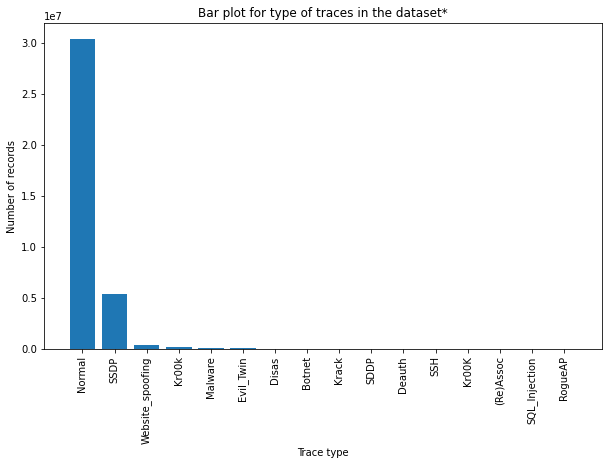

In [197]:
plt.figure(figsize=(10,6))

plt.bar(types,types_val)
plt.xlabel("Trace type")
plt.xticks(rotation=90)
plt.ylabel("Number of records")
plt.title('Bar plot for type of traces in the dataset*')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

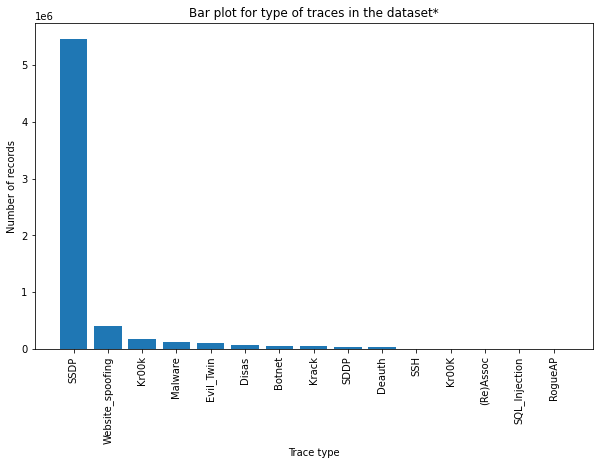

In [198]:
plt.figure(figsize=(10,6))

plt.bar(types[1:],types_val[1:])
plt.xlabel("Trace type")
plt.xticks(rotation=90)
plt.ylabel("Number of records")
plt.title('Bar plot for type of traces in the dataset*')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

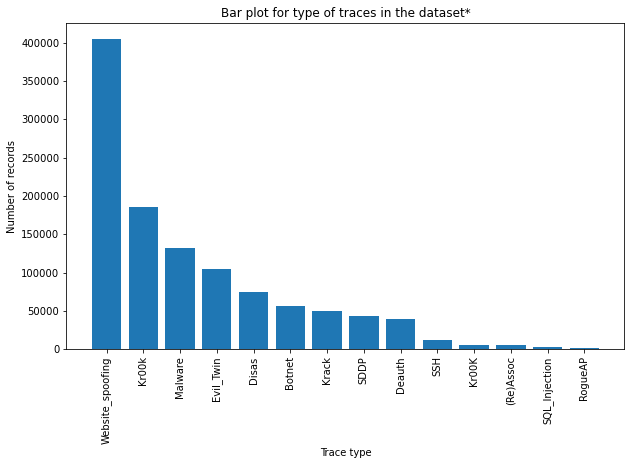

In [199]:
plt.figure(figsize=(10,6))

plt.bar(types[2:],types_val[2:])
plt.xlabel("Trace type")
plt.xticks(rotation=90)
plt.ylabel("Number of records")
plt.title('Bar plot for type of traces in the dataset*')
plt.show

In [204]:
data_df=data_df.drop(columns=['radiotap.mactime','wlan_radio.end_tsf','wlan_radio.start_tsf','wlan_radio.timestamp'])
data_df.shape

(36962587, 28)

In [205]:
nan_values5=data_df.isna().sum()
nan_values5

Label                                0
frame.len                            0
frame.number                         0
frame.time_delta                     0
frame.time_delta_displayed           0
frame.time_epoch                     0
frame.time_relative                  0
radiotap.datarate             17146504
radiotap.dbm_antsignal               0
radiotap.length                      0
radiotap.present.tsft                0
radiotap.timestamp.ts                0
wlan.duration                       57
wlan.fc.ds                           0
wlan.fc.frag                         0
wlan.fc.moredata                     0
wlan.fc.order                        0
wlan.fc.protected                    0
wlan.fc.pwrmgt                       0
wlan.fc.retry                        0
wlan.fc.subtype                      0
wlan.fc.type                         0
wlan.ra                              0
wlan.ta                              0
wlan_radio.data_rate                 0
wlan_radio.duration      

In [206]:
data_df.iloc[:,7].value_counts(dropna=False)


NaN         17146504
24.0000     15839489
6.0000       1975962
12.0000       687641
54.0000       647823
144.4440      130309
72.2222       115256
78.0000        82104
1.0000         54002
39.0000        36192
52.0000        34248
6.5000         31032
104.0000       29629
58.5000        27571
65.0000        27263
130.0000       22552
117.0000       15074
26.0000         9647
86.6667         9584
57.7778         8235
9.0000          6565
19.5000         6190
43.3333         4902
11.0000         4244
115.5560        3950
5.5000          2114
13.0000         1857
18.0000         1185
2.0000           564
48.0000          507
36.0000          351
28.8889           41
Name: radiotap.datarate, dtype: int64

In [207]:
data_df.iloc[:,12].value_counts(dropna=False)


48.0       15672495
0.0         3245145
158.0       1042258
2.0          979000
60.0         822765
             ...   
997.0             1
2029.0            1
1971.0            1
1317.0            1
16387.0           1
Name: wlan.duration, Length: 4506, dtype: int64

In [208]:
med_12=data_df.iloc[:,12].median()
mean_12=data_df.iloc[:,12].mean()
mode_12=data_df.iloc[:,12].mode()

In [209]:
print(med_12 , mean_12, mode_12.mean())

48.0 155.1480105934307 48.0


In [210]:
med_7=data_df.iloc[:,7].median()
mean_7=data_df.iloc[:,7].mean()
mode_7=data_df.iloc[:,7].mode()
print(med_7 , mean_7, mode_7.mean())

24.0 24.522860239225537 24.0


In [211]:
ind = data_df.iloc[:,7].isna()
data_df.iloc[ind, 7] = mode_7.mean()

In [212]:
ind = data_df.iloc[:,12].isna()
data_df.iloc[ind, 12] = mode_12.mean()

In [213]:
nan_values6=data_df.isna().sum()
nan_values6

Label                         0
frame.len                     0
frame.number                  0
frame.time_delta              0
frame.time_delta_displayed    0
frame.time_epoch              0
frame.time_relative           0
radiotap.datarate             0
radiotap.dbm_antsignal        0
radiotap.length               0
radiotap.present.tsft         0
radiotap.timestamp.ts         0
wlan.duration                 0
wlan.fc.ds                    0
wlan.fc.frag                  0
wlan.fc.moredata              0
wlan.fc.order                 0
wlan.fc.protected             0
wlan.fc.pwrmgt                0
wlan.fc.retry                 0
wlan.fc.subtype               0
wlan.fc.type                  0
wlan.ra                       0
wlan.ta                       0
wlan_radio.data_rate          0
wlan_radio.duration           0
wlan_radio.phy                0
wlan_radio.signal_dbm         0
dtype: int64

### Save the file with 28 features

In [214]:
data_df.to_csv('AWID3_clean_28.csv',
          index = False, 
          header = True)

### Split data and normalize